In [4]:
# Importar Pandas
import pandas as pd

In [5]:
# Ler as bases de dados
df1 = pd.read_excel("./BASE/datasets/Aracaju.xlsx")
df2 = pd.read_excel("./BASE/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("./BASE/datasets/Natal.xlsx")
df4 = pd.read_excel("./BASE/datasets/Recife.xlsx")
df5 = pd.read_excel("./BASE/datasets/Salvador.xlsx")

In [6]:
# Juntandos os dataframes
df = pd.concat([df1,df2,df3,df4,df5])

In [7]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [8]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [9]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
4,Salvador,2019-02-14,19.47,1037,3
38,Salvador,2019-01-01,165.34,1034,3
38,Recife,2019-01-01,104.53,983,4
104,Aracaju,2018-01-01,46.96,1522,1


In [10]:
# Verificando o tipo de dado
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [11]:
# Alterar o tipo de dado de determinada coluna
df["LojaID"] = df["LojaID"].astype("object")

In [12]:
# Consultar linhas com dados faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [13]:
# Substituir os valores nulos pela média
df[""].fillna(df[""].mean(), inplace=True)

KeyError: ''

In [ ]:
# Substituindo valores nulos por zero
df[""].fillna(0, inplace=True)

In [ ]:
# Apagar linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
# Apagar linhas com valores nulos em 1 coluna
df.dropna(subset=[""], inplace=True)

In [ ]:
# Apagar linhas com valores nulos em TODAS as colunas
df.dropna(how="all", inplace=True)

Criando novas colunas

In [14]:
# Criando uma coluna de  receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [15]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [16]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [17]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [18]:
# Retornando a maior receita
df["Receita"].max()

3544.0

In [19]:
# Retornando a menor receita
df["Receita"].min()

3.34

In [20]:
# nlargest - Ordena e mostra n maiores referente alguma coluna. ex:

df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [21]:
#nsmallest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [22]:
# Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [23]:
# Ordenar o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


Trabalhando com Datas

In [24]:
# Transformando a Coluna Data em tipo Int
df["Data"] = df["Data"].astype("int64")

In [25]:
# Conferindo mudança
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [26]:
# Transformando a coluna em data
df["Data"] = pd.to_datetime(df["Data"])

In [27]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [28]:
# Agrupando por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [29]:
# Criando coluna com o Ano de venda
df["Ano_Venda"] = df["Data"].dt.year

In [30]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
32,Salvador,2019-01-01,151.27,1035,1,151.27,1.0,2019
149,Natal,2019-01-02,22.38,1034,3,67.14,3.0,2019
157,Salvador,2019-01-02,150.17,1036,2,300.34,2.0,2019
208,Salvador,2019-01-02,39.40,1036,3,118.20,3.0,2019
62,Fortaleza,2019-01-01,106.21,1005,6,637.26,6.0,2019


In [31]:
# Extraindo o mês e dia
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [32]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda
40,Fortaleza,2019-02-13,19.13,1002,4,76.52,4.0,2019,2,13
208,Salvador,2019-01-02,39.40,1036,3,118.20,3.0,2019,1,2
25,Natal,2019-01-13,611.00,852,2,1222.00,2.0,2019,1,13
77,Natal,2019-04-01,426.00,853,3,1278.00,3.0,2019,4,1
221,Salvador,2019-01-02,142.23,1035,2,284.46,2.0,2019,1,2


In [33]:
# Retornando a Data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [34]:
df["Diferença_dias"] = df["Data"] - df["Data"].min()

In [35]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_dias
235,Natal,2019-01-03,41.84,1034,1,41.84,1.0,2019,1,3,367 days
111,Recife,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days
173,Salvador,2019-01-02,31.77,1034,2,63.54,2.0,2019,1,2,366 days
102,Recife,2019-01-01,96.50,982,7,675.50,7.0,2019,1,1,365 days
43,Natal,2019-04-01,538.00,853,3,1614.00,3.0,2019,4,1,455 days


In [36]:
# Criando coluna de trimestre
df["Trimestre_Venda"] = df["Data"].dt.quarter

In [37]:
df.sample(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_dias,Trimestre_Venda
204,Salvador,2019-01-02,151.41,1037,2,302.82,2.0,2019,1,2,366 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,4.0,2019,1,1,365 days,1
21,Aracaju,2018-01-01,37.36,1520,2,74.72,2.0,2018,1,1,0 days,1


In [38]:
# Filtrando vendas março 2019
venda_marco_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [39]:
venda_marco_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_dias,Trimestre_Venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


Agora Visualizando dados

In [40]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot: >

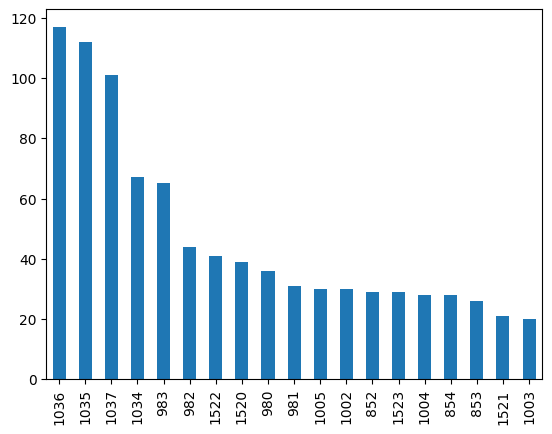

In [41]:
# Gráfico de barra
df["LojaID"].value_counts(ascending=False).plot.bar()

<AxesSubplot: >

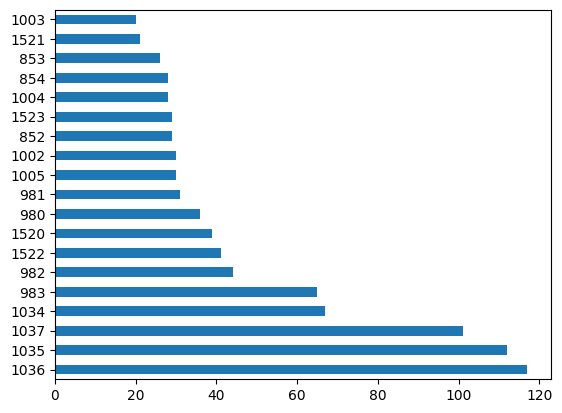

In [42]:
# Gráfico de barra horizontal
df["LojaID"].value_counts(ascending=False).plot.barh()

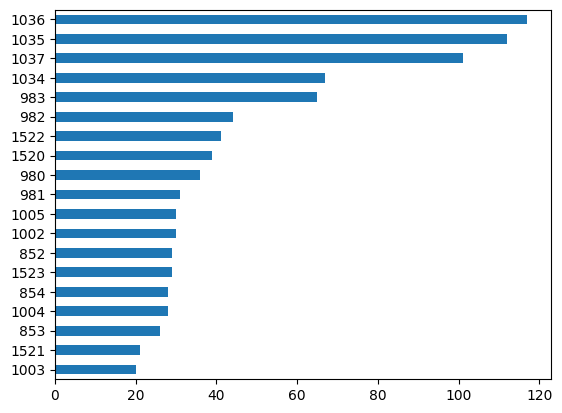

In [45]:
# agora do maior para o menor
df["LojaID"].value_counts(ascending=True).plot.barh()

<AxesSubplot: ylabel='Receita'>

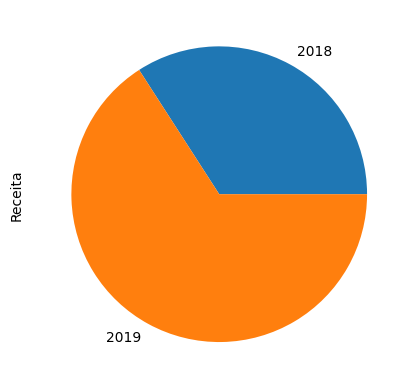

In [46]:
# Grafico em Pizza com dados obtidos anteriormente

df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [47]:
# Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

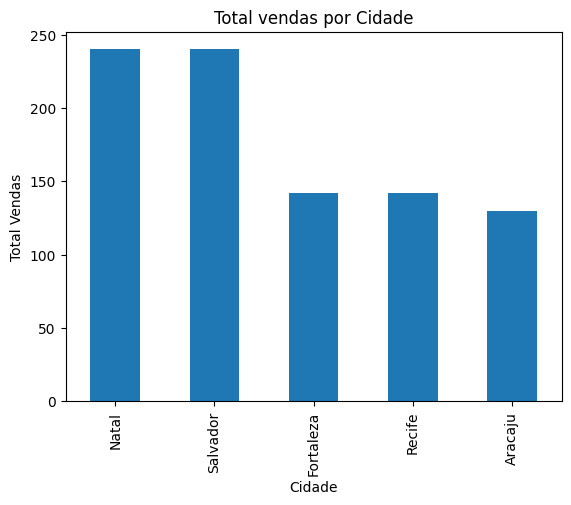

In [49]:
# Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

Text(0, 0.5, 'Total Vendas')

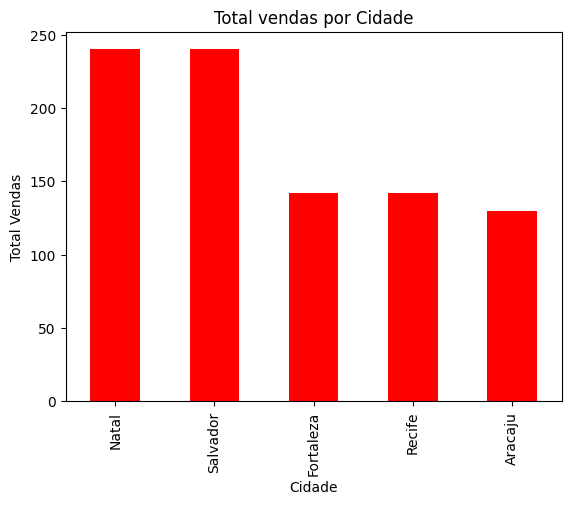

In [50]:
# Alterando a cor do Gráfico
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [51]:
# Alterando o estilo

plt.style.use("ggplot")

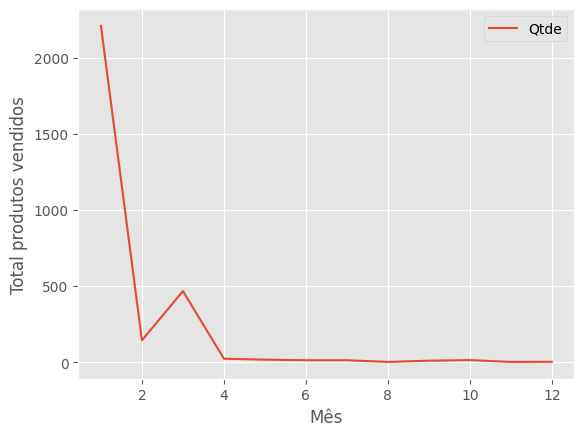

In [53]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot()
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()

In [54]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [56]:
# Selecionado apenas vendas 2019
df_2019 = df[df["Ano_Venda"] == 2019]

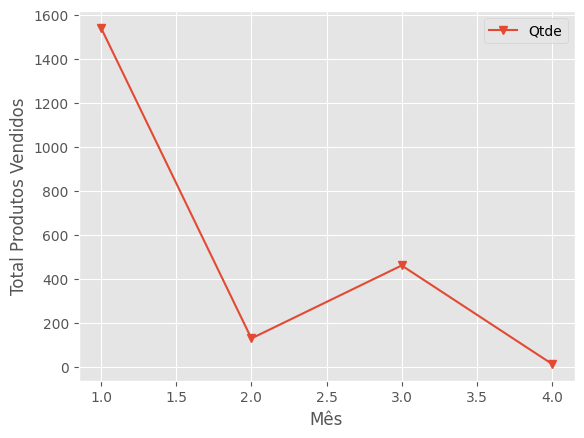

In [58]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker ="v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

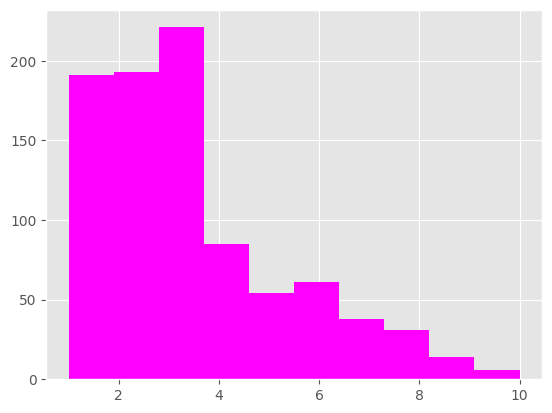

In [60]:
# Histograma
plt.hist(df["Qtde"], color="magenta");

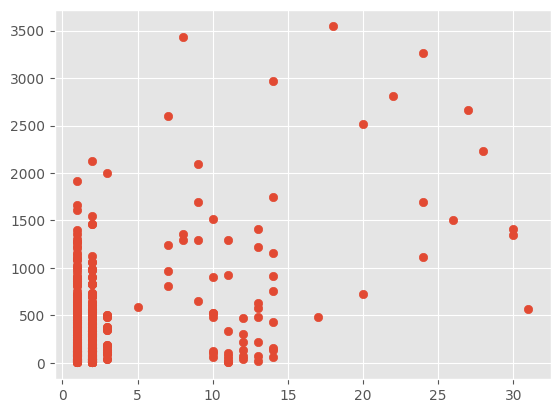

In [61]:
plt.scatter(x=df_2019["Dia_Venda"], y=df_2019["Receita"]);

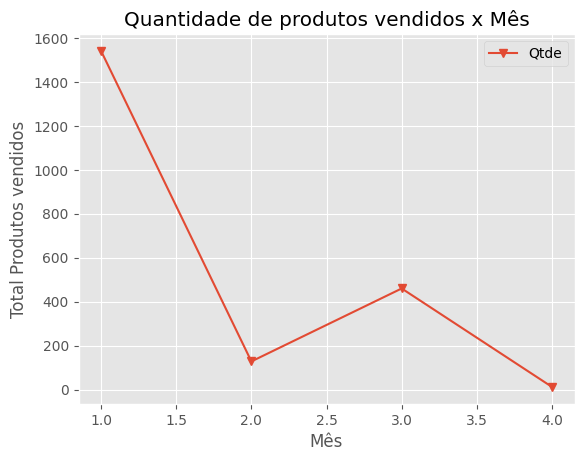

In [62]:
# Salvando em PNG

df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker ="v")
plt.title("Quantidade de produtos vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend()
plt.savefig("Grafico QTDE x MES.png")